## Wczytanie bibliotek

In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import pandas as pd
import time
import matplotlib.pyplot as plt

## Połączenie z bazą danych MongoDB

In [2]:
client = pymongo.MongoClient("mongodb://localhost/player_list")

In [3]:
db = client.get_database('player_list')

In [4]:
col = db.get_collection('player_list')

In [5]:
client.list_database_names()

['admin', 'config', 'local', 'player_list']

In [6]:
db.list_collection_names()

['player_list']

In [7]:
col.count_documents({})

149

In [8]:
col.find_one()

{'_id': 1,
 'team': 'FaZe',
 'nickname': 'karrigan',
 'name': 'Finn Andersen',
 'nationality': 'Denmark',
 'age': '32',
 'kdratio': '0.90',
 'headshots': '47.7',
 'majors_won': '0',
 'majors_played': '14'}

In [9]:
for player in col.find().limit(5):
    print(player)

{'_id': 1, 'team': 'FaZe', 'nickname': 'karrigan', 'name': 'Finn Andersen', 'nationality': 'Denmark', 'age': '32', 'kdratio': '0.90', 'headshots': '47.7', 'majors_won': '0', 'majors_played': '14'}
{'_id': 2, 'team': 'FaZe', 'nickname': 'rain', 'name': 'Håvard Nygaard', 'nationality': 'Norway', 'age': '27', 'kdratio': '1.07', 'headshots': '53.4', 'majors_won': '0', 'majors_played': '13'}
{'_id': 3, 'team': 'FaZe', 'nickname': 'Twistzz', 'name': 'Russel Van Dulken', 'nationality': 'Canada', 'age': '22', 'kdratio': '1.12', 'headshots': '59.7', 'majors_won': '0', 'majors_played': '5'}
{'_id': 4, 'team': 'FaZe', 'nickname': 'ropz', 'name': 'Robin Kool', 'nationality': 'Estonia', 'age': '22', 'kdratio': '1.17', 'headshots': '46.0', 'majors_won': '0', 'majors_played': '5'}
{'_id': 5, 'team': 'FaZe', 'nickname': 'broky', 'name': 'Helvijs Saukants', 'nationality': 'Latvia', 'age': '21', 'kdratio': '1.20', 'headshots': '30.5', 'majors_won': '0', 'majors_played': '1'}


In [10]:
player = pd.read_excel('player_list.xlsx')
player = player[player.columns[1:]]
player

,age,headshots,kdratio,majors_played,majors_won,name,nationality,nickname,team
0,32,47.7,0.90,14,0,Finn Andersen,Denmark,karrigan,FaZe
1,27,53.4,1.07,13,0,H?vard Nygaard,Norway,rain,FaZe
2,22,59.7,1.12,5,0,Russel Van Dulken,Canada,Twistzz,FaZe
3,22,46.0,1.17,5,0,Robin Kool,Estonia,ropz,FaZe
4,21,30.5,1.20,1,0,Helvijs Saukants,Latvia,broky,FaZe
...,...,...,...,...,...,...,...,...,...
144,25,55.2,1.10,3,0,Leonid Vishnyakov,Russia,chopper,Spirit
145,20,35.5,1.24,0,0,Abdul Gasanov,Russia,degster,Spirit
146,18,53.9,1.14,0,0,Boris Vorobiev,Russia,magixx,Spirit
147,19,44.1,1.02,0,0,Pavel Ogloblin,Russia,s1ren,Spirit


In [11]:
pl = player.describe()
pl

,age,headshots,kdratio,majors_played,majors_won
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,22.838926,44.474497,1.068054,2.644295,0.214765
std,3.121562,9.243896,0.094395,4.420581,0.693247
min,16.000000,21.000000,0.890000,0.000000,0.000000
25%,21.000000,39.000000,0.990000,0.000000,0.000000
50%,23.000000,46.000000,1.070000,1.000000,0.000000
75%,25.000000,51.400000,1.140000,3.000000,0.000000
max,32.000000,61.200000,1.340000,25.000000,4.000000


In [12]:
age = player['age'].mean()
pl = pl.drop('count')

([<matplotlib.axis.XTick at 0x2014414ae50>,
 [Text(1, 0, 'age'),
  Text(2, 0, 'headshots'),
  Text(3, 0, 'kdratio'),
  Text(4, 0, 'majors_played'),
  Text(5, 0, 'majors_won')])

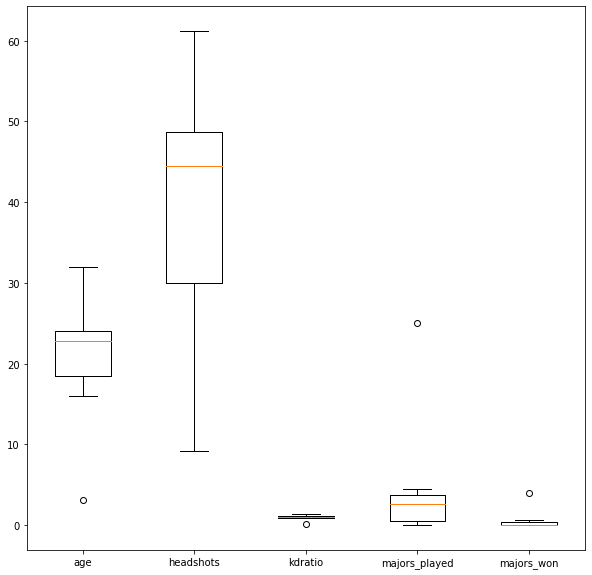

In [13]:
plt.figure(figsize=(10,10))
plt.boxplot(pl)
plt.xticks([1, 2, 3, 4, 5], ['age', 'headshots', 'kdratio', 'majors_played', 'majors_won'])